# Assignment-1 (CVL-100)

## Estimating AQI for  month

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import seaborn as sns
import re
import random
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from PIL import Image

In [3]:
def random_colours(number_of_colors):
    '''
    Simple function for random colours generation.
    Input:
        number_of_colors - integer value indicating the number of colours which are going to be generated.
    Output:
        Color in the following format: ['#E86DA4'] .
    '''
    colors = []
    for i in range(number_of_colors):
        colors.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    return colors

In [4]:
df = pd.read_excel("A1_G4.ods", engine="odf")

In [5]:
df.describe()

,"Anand Vihar, Delhi - DPCC",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
count,368,366,367.00,367,367,367
unique,368,366,364.00,360,359,335
top,06-02-2019 00:00,06-02-2019 00:00,94.48,None,None,None
freq,1,1,2.00,8,5,3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Anand Vihar, Delhi - DPCC  368 non-null    object
 1   Unnamed: 1                 366 non-null    object
 2   Unnamed: 2                 367 non-null    object
 3   Unnamed: 3                 367 non-null    object
 4   Unnamed: 4                 367 non-null    object
 5   Unnamed: 5                 367 non-null    object
dtypes: object(6)
memory usage: 17.4+ KB


In [7]:
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 2 to 367
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Anand Vihar, Delhi - DPCC  366 non-null    object
 1   Unnamed: 1                 366 non-null    object
 2   Unnamed: 2                 366 non-null    object
 3   Unnamed: 3                 366 non-null    object
 4   Unnamed: 4                 366 non-null    object
 5   Unnamed: 5                 366 non-null    object
dtypes: object(6)
memory usage: 20.0+ KB


In [9]:
df.head(10)

,"Anand Vihar, Delhi - DPCC",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
2,From Date,To Date,PM2.5,PM10,NO2,SO2
3,01-01-2019 00:00,02-01-2019 00:00,380.23,555.57,146.5,15.56
4,02-01-2019 00:00,03-01-2019 00:00,418.47,622.37,132.76,14.59
5,03-01-2019 00:00,04-01-2019 00:00,412.89,570.4,134.3,9.99
6,04-01-2019 00:00,05-01-2019 00:00,291.95,431.19,107.19,5.81
7,05-01-2019 00:00,06-01-2019 00:00,241.67,343.16,85.87,6.63
8,06-01-2019 00:00,07-01-2019 00:00,191.85,275.35,88.34,5.15
9,07-01-2019 00:00,08-01-2019 00:00,197.84,303.64,111.34,7.88
10,08-01-2019 00:00,09-01-2019 00:00,152.66,246.71,97.46,7.22
11,09-01-2019 00:00,10-01-2019 00:00,155.26,276.36,103.86,8.46


In [10]:
location = df.columns[0]
location

'Anand Vihar, Delhi - DPCC'

In [11]:
cols=[]
Prescribed_Standards = {"PM2.5:60","PM10:100","NO2:80","SO2:80"}
for i in df.loc[2]:
    cols.append(i)
print(cols)
print(Prescribed_Standards)

['From Date', 'To Date', 'PM2.5', 'PM10', 'NO2', 'SO2']
{'NO2:80', 'PM10:100', 'PM2.5:60', 'SO2:80'}


In [12]:
df

,"Anand Vihar, Delhi - DPCC",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
2,From Date,To Date,PM2.5,PM10,NO2,SO2
3,01-01-2019 00:00,02-01-2019 00:00,380.23,555.57,146.5,15.56
4,02-01-2019 00:00,03-01-2019 00:00,418.47,622.37,132.76,14.59
5,03-01-2019 00:00,04-01-2019 00:00,412.89,570.4,134.3,9.99
6,04-01-2019 00:00,05-01-2019 00:00,291.95,431.19,107.19,5.81
...,...,...,...,...,...,...
363,27-12-2019 00:00,28-12-2019 00:00,292.34,426.05,246.23,9.09
364,28-12-2019 00:00,29-12-2019 00:00,336.75,500.48,331.13,12.24
365,29-12-2019 00:00,30-12-2019 00:00,359.65,517.02,215.1,11.83
366,30-12-2019 00:00,31-12-2019 00:00,369.66,500.67,63.66,8.56


In [13]:
df.columns = cols
df.drop([2], inplace=True)

In [14]:
df

,From Date,To Date,PM2.5,PM10,NO2,SO2
3,01-01-2019 00:00,02-01-2019 00:00,380.23,555.57,146.5,15.56
4,02-01-2019 00:00,03-01-2019 00:00,418.47,622.37,132.76,14.59
5,03-01-2019 00:00,04-01-2019 00:00,412.89,570.4,134.3,9.99
6,04-01-2019 00:00,05-01-2019 00:00,291.95,431.19,107.19,5.81
7,05-01-2019 00:00,06-01-2019 00:00,241.67,343.16,85.87,6.63
...,...,...,...,...,...,...
363,27-12-2019 00:00,28-12-2019 00:00,292.34,426.05,246.23,9.09
364,28-12-2019 00:00,29-12-2019 00:00,336.75,500.48,331.13,12.24
365,29-12-2019 00:00,30-12-2019 00:00,359.65,517.02,215.1,11.83
366,30-12-2019 00:00,31-12-2019 00:00,369.66,500.67,63.66,8.56


In [15]:
df.reset_index(inplace=True)

In [16]:
df

,index,From Date,To Date,PM2.5,PM10,NO2,SO2
0,3,01-01-2019 00:00,02-01-2019 00:00,380.23,555.57,146.5,15.56
1,4,02-01-2019 00:00,03-01-2019 00:00,418.47,622.37,132.76,14.59
2,5,03-01-2019 00:00,04-01-2019 00:00,412.89,570.4,134.3,9.99
3,6,04-01-2019 00:00,05-01-2019 00:00,291.95,431.19,107.19,5.81
4,7,05-01-2019 00:00,06-01-2019 00:00,241.67,343.16,85.87,6.63
...,...,...,...,...,...,...,...
360,363,27-12-2019 00:00,28-12-2019 00:00,292.34,426.05,246.23,9.09
361,364,28-12-2019 00:00,29-12-2019 00:00,336.75,500.48,331.13,12.24
362,365,29-12-2019 00:00,30-12-2019 00:00,359.65,517.02,215.1,11.83
363,366,30-12-2019 00:00,31-12-2019 00:00,369.66,500.67,63.66,8.56


In [17]:
df.drop("index",1,inplace=True)
df

,From Date,To Date,PM2.5,PM10,NO2,SO2
0,01-01-2019 00:00,02-01-2019 00:00,380.23,555.57,146.5,15.56
1,02-01-2019 00:00,03-01-2019 00:00,418.47,622.37,132.76,14.59
2,03-01-2019 00:00,04-01-2019 00:00,412.89,570.4,134.3,9.99
3,04-01-2019 00:00,05-01-2019 00:00,291.95,431.19,107.19,5.81
4,05-01-2019 00:00,06-01-2019 00:00,241.67,343.16,85.87,6.63
...,...,...,...,...,...,...
360,27-12-2019 00:00,28-12-2019 00:00,292.34,426.05,246.23,9.09
361,28-12-2019 00:00,29-12-2019 00:00,336.75,500.48,331.13,12.24
362,29-12-2019 00:00,30-12-2019 00:00,359.65,517.02,215.1,11.83
363,30-12-2019 00:00,31-12-2019 00:00,369.66,500.67,63.66,8.56


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   From Date  365 non-null    object
 1   To Date    365 non-null    object
 2   PM2.5      365 non-null    object
 3   PM10       365 non-null    object
 4   NO2        365 non-null    object
 5   SO2        365 non-null    object
dtypes: object(6)
memory usage: 17.2+ KB


In [19]:
def aqi(I_lo,I_hi,B_lo,B_hi,C_p):
    return ((I_hi - I_lo)/(B_hi - B_lo))*(C_p - B_lo) + I_lo

def aqi_pm2_5(x):
    
    if(x<=30):
        ans = aqi(0,50,0,30,x)
    elif(x<=60):
        ans = aqi(51,100,31,60,x)
    elif(x<=90):
        ans = aqi(101,200,61,90,x)
    elif(x<=120):
        ans = aqi(201,300,91,120,x)
    elif(x<=150):
        ans = aqi(301,400,121,250,x)
    else:
        ans = 500
    return ans

def aqi_pm10(x):

    if(x<=50):
        ans = aqi(0,50,0,50,x)
    elif(x<=100):
        ans = aqi(51,100,51,100,x)
    elif(x<=250):
        ans = aqi(101,200,101,250,x)
    elif(x<=350):
        ans = aqi(201,300,251,350,x)
    elif(x<=430):
        ans = aqi(301,400,351,430,x)
    else:
        ans = 500
    return ans

def aqi_no2(x):
    
    if(x<=40):
        ans = aqi(0,50,0,40,x) 
    elif(x<=80):
        ans = aqi(51,100, 41,80,x)
    elif(x<=180):
        ans = aqi(101,200,81,180,x)
    elif(x<=280):
        ans = aqi(201,300,181,280,x) 
    elif(x<=400):
        ans = aqi(301,400,281,400,x) 
    else:
        ans = 500
    return ans

def aqi_so2(x):
    
    if(x<=40):
        ans = aqi(0,50,0,40,x)
    elif(x<=80):
        ans = aqi(51,100,41,80,x)
    elif(x<=380):
        ans = aqi(101,200,81,380,x)
    elif(x<=800):
        ans = aqi(201,300,381,800,x)
    elif(x<=1600):
        ans = aqi(301,400,800,1600,x)
    else:
        ans = 500
    return ans
    

In [20]:
df

,From Date,To Date,PM2.5,PM10,NO2,SO2
0,01-01-2019 00:00,02-01-2019 00:00,380.23,555.57,146.5,15.56
1,02-01-2019 00:00,03-01-2019 00:00,418.47,622.37,132.76,14.59
2,03-01-2019 00:00,04-01-2019 00:00,412.89,570.4,134.3,9.99
3,04-01-2019 00:00,05-01-2019 00:00,291.95,431.19,107.19,5.81
4,05-01-2019 00:00,06-01-2019 00:00,241.67,343.16,85.87,6.63
...,...,...,...,...,...,...
360,27-12-2019 00:00,28-12-2019 00:00,292.34,426.05,246.23,9.09
361,28-12-2019 00:00,29-12-2019 00:00,336.75,500.48,331.13,12.24
362,29-12-2019 00:00,30-12-2019 00:00,359.65,517.02,215.1,11.83
363,30-12-2019 00:00,31-12-2019 00:00,369.66,500.67,63.66,8.56


In [70]:
a = [0,1,2,3,4]
print(a[-4:-2])

[1, 2]


In [136]:
def chart(yearly_varition,max_cnt,start,end):
    mycolors = ["#228B22", "#9ACD32", "#CCCC00", "#FFA500", "#FF0000", "#B22222"]
    piechart = plt.pie(yearly_varition.values(), explode=[0,0,0,0,0,0.1], colors = mycolors,autopct='%1.0f%%',pctdistance=1.1)
    labels_for_legend = ["Good (0-50)","Satisfactory (51-100)","Moderate (101-200)","Poor (201-300)","Very Poor (301-400)","Severe (401-500)"]    
    for i in range(len(labels_for_legend)):
        s = " ".join(labels_for_legend[i].split(" ")[0:len(labels_for_legend[i].split(" "))-1])
        labels_for_legend[i] = labels_for_legend[i] + " — " + str(yearly_varition[s]) 
    plt.legend(title = "AQI Category", loc = "best", bbox_to_anchor=(1,1), labels=labels_for_legend)
    
    if(start==0 and end==364):
        s = "\nJanuary to December 2019"
    elif(start==0 and end==58):
        s = "\nWinter Season - December 2018 to February 2019"
    elif(start==59 and end==150):
        s = "\nPre-Monsoon Season - March to May 2019"
    elif(start==151 and end==242):
        s = "\nMonsoon Season - June to August 2019"
    elif(start==243 and end==333):
        s = "\nPost-Monsoon Season - September to November 2019"
    elif(start==0 and end==30):
        s = "\nJanuary 2019"
    elif(start==31 and end==58):
        s = "\nFebruary 2019"        
    elif(start==59 and end==89):
        s = "\nMarch 2019"
    elif(start==90 and end==119):
        s = "\nApril 2019"
    elif(start==120 and end==150):
        s = "\nMay 2019"
    elif(start==151 and end==180):
        s = "\nJune 2019"
    elif(start==181 and end==211):
        s = "\nJuly 2019"
    elif(start==212 and end==242):
        s = "\nAugust 2019"
    elif(start==243 and end==272):
        s = "\nSeptember 2019"
    elif(start==273 and end==303):
        s = "\nOctober 2019"
    elif(start==304 and end==333):
        s = "\nNovember 2019"
    elif(start==334 and end==364):
        s = "\nDecember 2019"        
        
    plt.title("Variation of AQI in " + location.split("-")[0] + s)
    plt.tight_layout()
    plt.show()
    
def main(start,end,start2=-1,end2=-1):
    pollutants = {"PM2.5":"pm2_5","PM10":"pm_10","NO2":"no2","SO2":"so2"}
    yearly_varition = {"Good":0,"Satisfactory":0,"Moderate":0,"Poor":0,"Very Poor":0,"Severe":0}
    mean = {}
    max_cnt = {"PM2.5":0,"PM10":0,"NO2":0,"SO2":0}
    for j in pollutants.keys():
        x = 0
        cnt = 0
        for i in df.index:
            if(type(df[j][i])==float and (start<=i<=end or start2<=i<=end2)):
                x += df[j][i]
                cnt += 1
        x/=cnt
        mean[j]=x

    for i in df.index:
        if((i<start or i>end) and (i<start2 or i>end2)):
            continue
        aqi_list = []
        for j in pollutants.keys():
            s = "aqi_" + pollutants[j]
            if(type(df[j][i])==float):
                val = (float)(df[j][i])
            else:
                val = mean[j]

            if s=="aqi_pm2_5":
                ans = aqi_pm2_5(val)
            elif s=="aqi_pm10":
                ans = aqi_pm10(val)
            elif s=="aqi_no2":
                ans = aqi_no2(val)
            else:
                ans = aqi_so2(val)
            ans_ = [ans,j]
            aqi_list.append(ans_) 

        aqi_list = sorted(aqi_list, key=lambda x: x[0],reverse=True)
        max_val = aqi_list[0][0]

        if(max_val<=50):
            yearly_varition["Good"]+=1
        elif(max_val<=100):
            yearly_varition["Satisfactory"]+=1
        elif(max_val<=200):
            yearly_varition["Moderate"]+=1
        elif(max_val<=300):
            yearly_varition["Poor"]+=1
        elif(max_val<=400):
            yearly_varition["Very Poor"]+=1
        else:
            yearly_varition["Severe"]+=1

        k=0
        while k<4 and aqi_list[k][0]==max_val:
            max_cnt[aqi_list[k][1]]+=1
            k+=1
    chart(yearly_varition,max_cnt,start,end)

#     print(max_cnt)
#     print(yearly_varition)

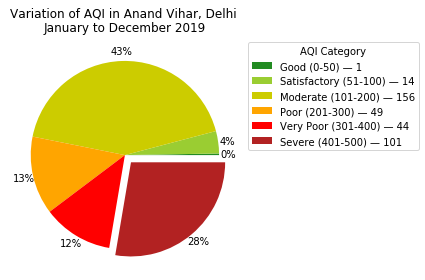

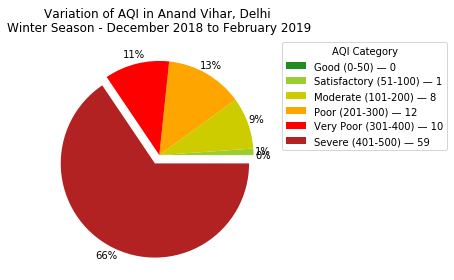

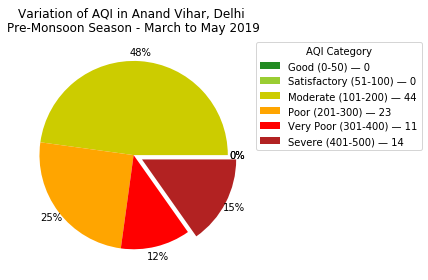

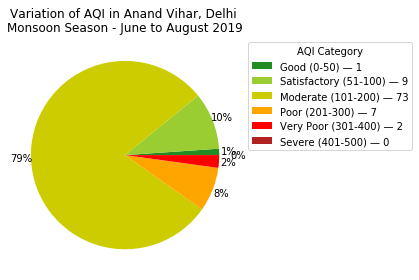

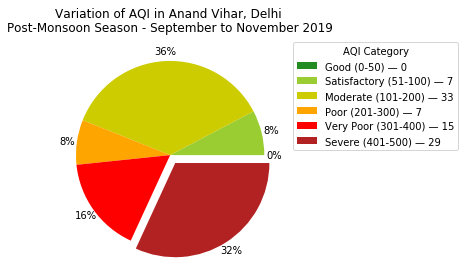

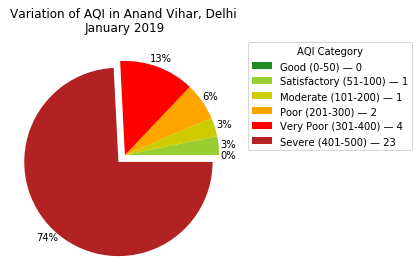

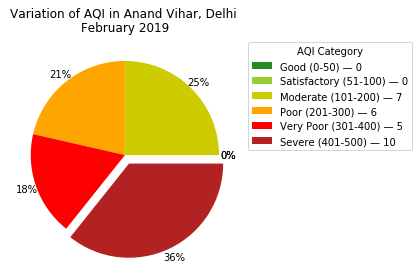

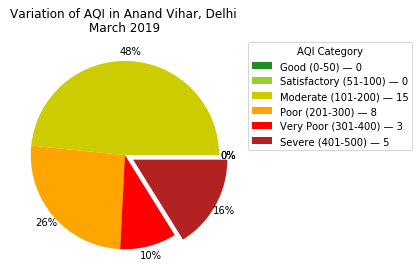

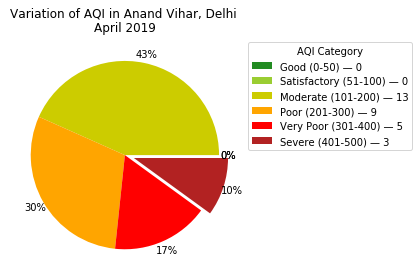

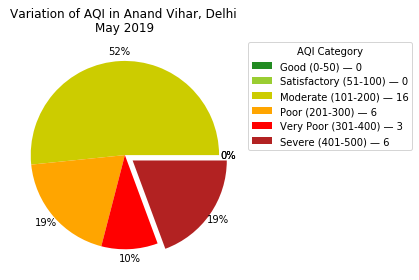

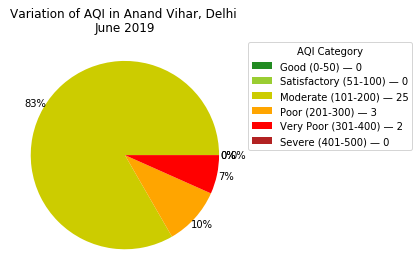

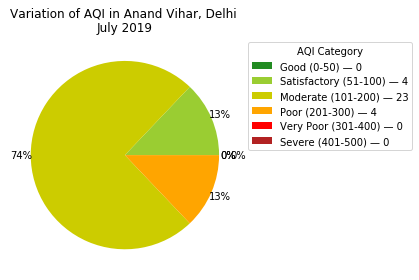

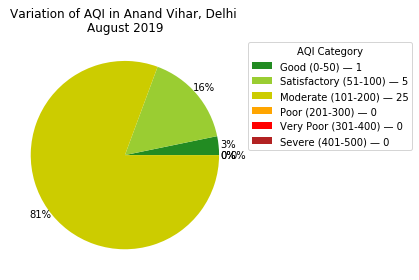

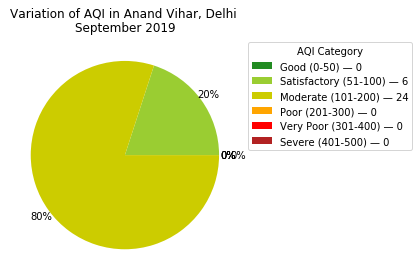

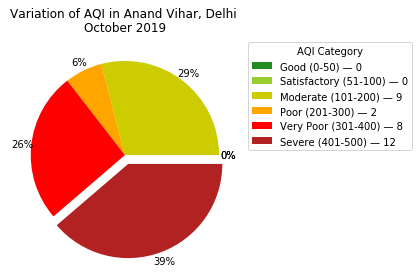

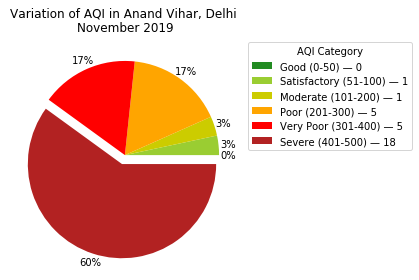

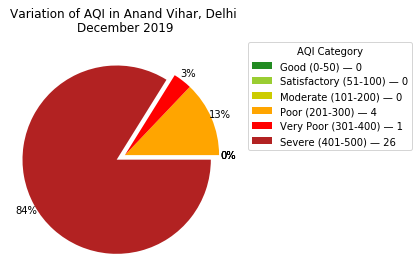

In [137]:
main(0,364)            # Whole Year
main(0,58,334,364)     # 1st Jan to 28th Feb            (Winter)
main(59,150)           # 1st March to 31st May          (Pre-Monsoon)
main(151,242)          # 1st June to 31st August        (Monsoon)
main(243,333)          # 1st September to 30th November (Post-Monsoon)

# Monthly AQI analysis
main(0,30)
main(31,58)
main(59,89)
main(90,119)
main(120,150)
main(151,180)
main(181,211)
main(212,242)
main(243,272)
main(273,303)
main(304,333)
main(334,364)

In [124]:
# display(df)

In [123]:
# df.loc[[30]]
# pd.set_option("display.max_rows", None, "display.max_columns", None)
# print(df)